# L2 - Multilayer perceptron

### Papers
1. [TensorFlow](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/45166.pdf)

### TensorFlow
1. [Installing TensorFlow](https://www.tensorflow.org/install/)
2. [Basics of TensorFlow](https://www.tensorflow.org/get_started/get_started)
3. [Mnist with TensorFlow](https://www.tensorflow.org/get_started/mnist/pros)
4. [TensorFlow Mechanics](https://www.tensorflow.org/get_started/mnist/mechanics)
5. [Visualization](https://www.tensorflow.org/get_started/graph_viz)


### One more thing
1. [Jupyter tutorial](https://habrahabr.ru/company/wunderfund/blog/316826/)
2. [Plot.ly](https://plot.ly/python/)
3. [Widgets](http://jupyter.org/widgets.html)

### 1. Linear multi-classification problem

We have already learned binary linear classifier
$$y = \text{sign}(w^Tx).$$
There are [several approaches](https://en.wikipedia.org/wiki/Multiclass_classification) to solve the problem of multi-class classification. For example [reduction](https://en.wikipedia.org/wiki/Multiclass_classification#Transformation_to_Binary) of problem to binary classifier or [modification](https://en.wikipedia.org/wiki/Support_vector_machine#Multiclass_SVM) of the known model. However we are interested in approaches that is applied in neural networks.

For each class $c \in 1, \dots, |C|$ we have an individual row $w_i$ of matrix $W$. Then the probability of $x$ belonging to a particular class is equal to
$$p_i = \frac{\exp(w^T_ix)}{\sum_j \exp(w^T_jx)}.$$
This is nothing, but [softmax](https://en.wikipedia.org/wiki/Softmax_function) function of $Wx$.
$$(p_1, \dots, p_{|C|}) = \text{softmax}(Wx).$$

If you look closely, $\text{softmax}$ is a more general variant of sigmoid. To see this, it suffices to consider the case $|C|=2$. As usual the training can be reduced to minimization of the empirical risk, namely, optimization problem
$$\arg\min_W Q(W) = \arg\min_W -\frac{1}{\mathcal{l}}\sum_y\sum_i [y = i] \cdot \ln(p_i(W)).$$
Actually, the maximization of the log-likelihood is written above.

#### Exercises
1. Find $\frac{dQ}{dW}$ in matrix form (hint: start with $\frac{dQ}{dw_i}$ for begining).
2. Please plot several mnist images (e.g using grid 5x5).
3. Train linear multi-label classifier for [mnist](https://www.kaggle.com/c/digit-recognizer) dataset with TensorFlow (possible, [this tutorial](https://www.tensorflow.org/get_started/mnist/pros) can help you).
4. Chek accuracy on train and validation sets.
5. Use a local [TensorBoard instance](https://www.tensorflow.org/get_started/graph_viz) to visualize resulted graph (no need to include in lab).

Basics

In [12]:
import tensorflow as tf

node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
#print(node1, node2)

sess = tf.Session()
print(sess.run([node1, node2]))

from __future__ import print_function
node3 = tf.add(node1, node2)
print("node3:", node3)
print("sess.run(node3):", sess.run(node3))

a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

print(sess.run(adder_node, {a: 3, b: 4.5}))
print(sess.run(adder_node, {a: [1, 3], b: [2, 4]}))


add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, {a: 3, b: 4.5}))

#  Variables allow us to add trainable parameters to a graph

W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W*x + b


init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(linear_model, {x: [1, 2, 3, 4]}))

y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

fixW = tf.assign(W, [-1.])
fixb = tf.assign(b, [1.])
sess.run([fixW, fixb])
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

sess.run(init) # reset values to incorrect defaults.
for i in range(1000):
    sess.run(train, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})

print(sess.run([W, b]))

x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))




[3.0, 4.0]
node3: Tensor("Add_9:0", shape=(), dtype=float32)
sess.run(node3): 7.0
7.5
[ 3.  7.]
22.5
[ 0.          0.30000001  0.60000002  0.90000004]
23.66
0.0
[array([-0.9999969], dtype=float32), array([ 0.99999082], dtype=float32)]
W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11


In [15]:
# NumPy is often used to load, manipulate and preprocess data.
import numpy as np
import tensorflow as tf

# Declare list of features. We only have one numeric feature. There are many
# other types of columns that are more complicated and useful.
feature_columns = [tf.feature_column.numeric_column("x", shape=[1])]

# An estimator is the front end to invoke training (fitting) and evaluation
# (inference). There are many predefined types like linear regression,
# linear classification, and many neural network classifiers and regressors.
# The following code provides an estimator that does linear regression.
estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)

# TensorFlow provides many helper methods to read and set up data sets.
# Here we use two data sets: one for training and one for evaluation
# We have to tell the function how many batches
# of data (num_epochs) we want and how big each batch should be.
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7, 0.])
input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=None, shuffle=True)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)

# We can invoke 1000 training steps by invoking the  method and passing the
# training data set.
estimator.train(input_fn=input_fn, steps=1000)

# Here we evaluate how well our model did.
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("train metrics: %r"% train_metrics)
print("eval metrics: %r"% eval_metrics)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmph6b9ouer', '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_save_summary_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmph6b9ouer/model.ckpt.
INFO:tensorflow:loss = 6.0, step = 1
INFO:tensorflow:global_step/sec: 752.871
INFO:tensorflow:loss = 0.0551101, step = 101 (0.135 sec)
INFO:tensorflow:global_step/sec: 723.274
INFO:tensorflow:loss = 0.010295, step = 201 (0.138 sec)
INFO:tensorflow:global_step/sec: 665.665
INFO:tensorflow:loss = 0.00335807, step = 301 (0.150 sec)
INFO:tensorflow:global_step/sec: 689.339
INFO:tensorflow:loss = 0.000966275, step = 401 (0.145 sec)
INFO:tensorflow:global_step/sec: 667.42
INFO:tensorflow:loss = 5.64552e-05, step = 501 (0.150 sec)
INFO:tensor

In [16]:
import numpy as np
import tensorflow as tf

# Declare list of features, we only have one real-valued feature
def model_fn(features, labels, mode):
    # Build a linear model and predict values
    W = tf.get_variable("W", [1], dtype=tf.float64)
    b = tf.get_variable("b", [1], dtype=tf.float64)
    y = W*features['x'] + b
    # Loss sub-graph
    loss = tf.reduce_sum(tf.square(y - labels))
    # Training sub-graph
    global_step = tf.train.get_global_step()
    optimizer = tf.train.GradientDescentOptimizer(0.01)
    train = tf.group(optimizer.minimize(loss),
                    tf.assign_add(global_step, 1))
    # EstimatorSpec connects subgraphs we built to the
    # appropriate functionality.
    return tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=y,
      loss=loss,
      train_op=train)

estimator = tf.estimator.Estimator(model_fn=model_fn)
# define our data sets
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7., 0.])

input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=None, shuffle=True)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)

# train
estimator.train(input_fn=input_fn, steps=1000)
# Here we evaluate how well our model did.
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("train metrics: %r"% train_metrics)
print("eval metrics: %r"% eval_metrics)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmpk4yzwi74', '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_save_summary_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpk4yzwi74/model.ckpt.
INFO:tensorflow:loss = 3.15136617367, step = 1
INFO:tensorflow:global_step/sec: 636.341
INFO:tensorflow:loss = 0.0119537822515, step = 101 (0.159 sec)
INFO:tensorflow:global_step/sec: 732.445
INFO:tensorflow:loss = 0.00182199197315, step = 201 (0.136 sec)
INFO:tensorflow:global_step/sec: 733.519
INFO:tensorflow:loss = 0.0004262363052, step = 301 (0.136 sec)
INFO:tensorflow:global_step/sec: 631.469
INFO:tensorflow:loss = 5.77171014672e-05, step = 401 (0.158 sec)
INFO:tensorflow:global_step/sec: 730.612
INFO:tensorflow:loss = 2.501725224

This is about MNIST.

In [109]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import tensorflow as tf

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


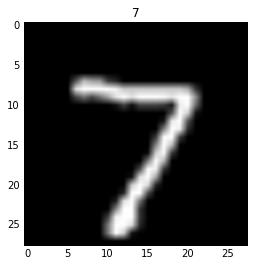

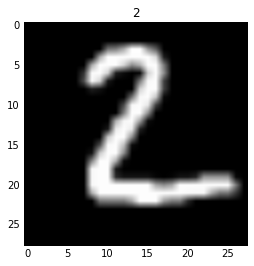

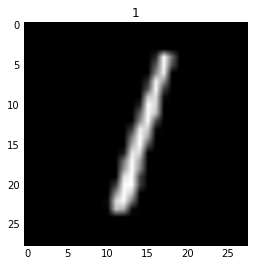

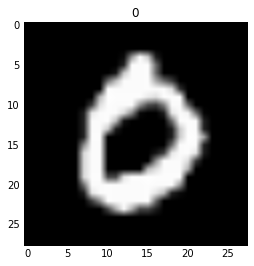

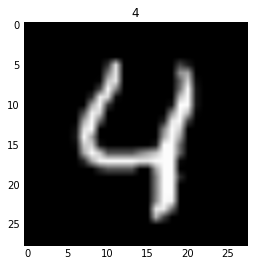

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import time

#print(mnist.test.images)

for i in range(5):
    digit = np.array(mnist.test.images[i].reshape((28, 28)))
    t = mnist.test.labels[i];
    p = np.where(t == 1)[0][0]
    plt.title(str(p))
    plt.imshow(digit, cmap='gray')
    plt.show()

In [145]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())

y = tf.matmul(x,W) + b

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9171


(10, 784)


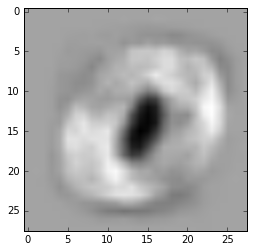

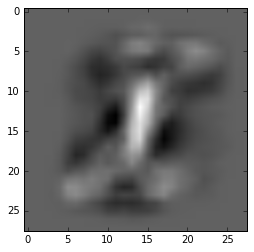

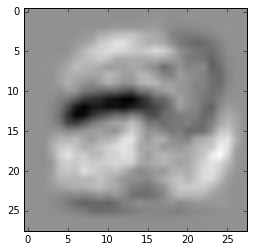

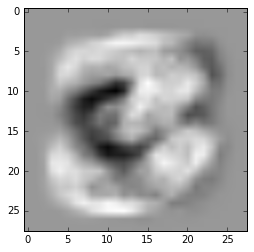

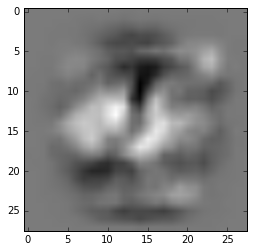

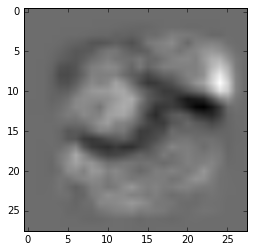

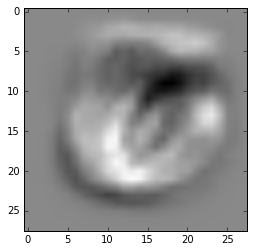

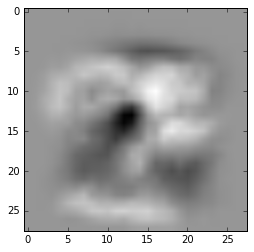

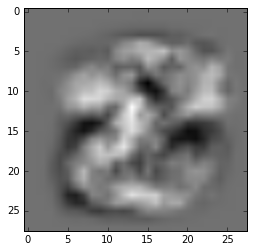

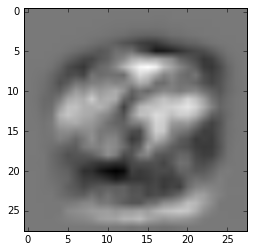

In [141]:
W_1 = np.array(W.eval().T)
k = W_1.shape
print(k)

for i in range(10):
    W_pic = W_1[i].reshape((28, 28))
    plt.imshow(W_pic, cmap='gray')
    plt.show()


Let's briefly touch on themes of regularization. As was discussed before, there are different approaches. We focus on the modification of loss function.

$$\arg\min_W -\frac{1}{\mathcal{l}}\sum_y\sum_i [y = i] \cdot \ln(p_i(W)) + \lambda_1 L_1(W) + \lambda_2 L_2(W)$$

1. $L_1(W) = sum_{i,j} |w_{i,j}|$ - sparsify weights (force to not use uncorrelated features)
2. $L_2(W) = sum_{i,j} w_{i,j}^2$ - minimize weights (force to not overfit)

#### Exercises
1. Train model again using both type of regularization.
2. Plot matrix of weights.
3. Which pixels have zero weights? What does it mean?
4. Have you improved accuracy on validation?

In [146]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())

y = tf.matmul(x,W) + b

lambda_1 = 0
lambda_2 = 2
Lasso = tf.reduce_sum(tf.abs(W))
Ridge = tf.reduce_sum(W * W)

cross_entropy_reg = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)) 
+ lambda_1 * Lasso + lambda_2 * Ridge

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy_reg)

for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9184


### 2. Universal approximation theorem

What if we add more layers to our model? Namely, we train two matrix $W_2$ and $W_1$
$$softmax(W_2\cdot(W_1x)).$$

At first glance adding more parameters helps to increase the generalizing ability of the model. Buy actually we have the same model $softmax(Wx)$, where $W = W_2\cdot W_1$. But everyting changes with adding ome more layer. Let's add nonlinear function $\sigma$ between $W_2$ and $W_1$

$$softmax(W_2\cdot \sigma(W_1x)).$$

Kurt Hornik showed in 1991 that it is not the specific choice of the nonlinear function, but rather the multilayer feedforward architecture itself which gives neural networks the potential of being universal approximators. The output units are always assumed to be linear. For notational convenience, only the single output case will be shown. The general case can easily be deduced from the single output case.

Let $\sigma(\cdot)$ be a nonconstant, bounded, and monotonically-increasing continuous function.
Let $\mathcal{S}_m \subset \mathbb{R}^m$ denote any compact set. 
Then, given any $\varepsilon > 0$ and any coninuous function $f$ on $\mathcal{S}_m$, there exist an integer $N$ and real constants $v_i$, $b_i$ amd real vectors $w_i$ that

$$\left| \sum _{i=1}^{N}v_{i}\sigma \left( w_i^{T} x+b_i \right) - f(x) \right| < \varepsilon, ~~~ \forall x \in \mathcal{S}_m.$$

The theorem has non-constructive proof, it meams that no estimates for $N$ and no method to find approximation's parameters.

#### Exercises
1. Let $\sigma$ – [heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function) and $x \in \{0, 1\}^2$. Prove that $y = \sigma(wx + b)$ can approximate boolean function **OR** (hint: use constructive proof).
2. What about **AND** function?
3. Is it possible to implement **XOR**? Prove your words.
4. Prove that 2-layer network can implement any boolean function.

#### More useful facts:
1. A 2-layer network in in $\mathbb{R}^n$ allows to define convex polyhedron..
2. A 3-layer network in в $\mathbb{R}^n$ allows to define a not necessarily convex and not even necessarily connected area.

In [147]:
# это не нужно делать

### 3. Backpropagation
Backpropagation is a method used to calculate the error contribution of each layer after a batch of data. It is a special case of an older and more general technique called automatic differentiation. In the context of learning, backpropagation is commonly used by the gradient descent optimization algorithm to adjust the weight of layers by calculating the gradient of the loss function. This technique is also sometimes called backward propagation of errors, because the error is calculated at the output and distributed back through the network layers. The main motivation of method is simplify evaluation of gradient which is complex problem for multilayer nets.

We need the following notation. Let $(y^1,\dots,y^n) = f(x^1,\dots,x^n)$ is some differentiable function and $\frac{dy}{dx}$ is matrix
$$\frac{dy}{dx} = \Big[ J_{ij} = \frac{\partial y^i}{\partial x^j} \Big]$$

Without violating the generality, we can assume that each layer is a function $x_{i} = f(x_{i-1}, w_i)$. As last layer we add loss function, so we can assume our multi-layer net as function $Q(x_0) = Q(f_n(f_{n-1}(\dots, w_{n-1}), w_n))$.

#### Forward step
Propagation forward through the network to generate the output values. Calculation of the loss function.

#### Backward step
Let's look at last layer. We can simply find $\frac{dQ}{dx_n}$. Now we can evaluate 

$$\frac{dQ}{dw_n} = \frac{dQ}{dx_n}\frac{dx_n}{dw_n} \text{ and } \frac{dQ}{dx_{n-1}} = \frac{dQ}{dx_n}\frac{dx_n}{dx_{n-1}}$$

Now we need calculate $\frac{dQ}{dw_{n-2}}$ и $\frac{dQ}{dx_{n-2}}$. But we have the same situation. We know $\frac{dQ}{dx_k}$, so can evaluate $\frac{dQ}{dw_k}$ and $\frac{dQ}{dx_{k-1}}$. Repeating this operation we find all the gradients. Now it's only remains to make a gradient step to update weights.

#### Exercises
1. Read more about [vanishing gradient](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).
2. Train 2 layer net. Use sigmoid as nonlinearity.
3. Check accuracy on validation set.
4. Use [ReLu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) or LeakyReLu as nonlinearity. Compare accuracy and convergence with previous model.
5. Play with different architectures (add more layers, regularization and etc).
6. Show your best model.
7. How does quality change with adding layers. Prove your words, train model for 2, 3, 5, 7 and 10 layers.
8. Using backpropagation find optimal  digit 8 for your net.*

In [ ]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable
(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)




W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2


In [173]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W_1 = tf.Variable(tf.zeros([784,1024]))
b_1 = tf.Variable(tf.zeros([1024]))

W_2 = tf.Variable(tf.zeros([1024,10]))
b_2 = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())

D_1 = tf.layers.dense(inputs=x, units=1024, kernel_initializer=W_1, bias_initializer=b_1, activation=tf.nn.sigmoid)

logits = tf.layers.dense(inputs=D_1, units=10, kernel_initializer=W_2, bias_initializer=b_2)

#lambda_1 = 0
#lambda_2 = 2
#Lasso = tf.reduce_sum(tf.abs(W))
#Ridge = tf.reduce_sum(W * W)

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=logits)) 

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


ValueError: initial_value must be specified.

In [157]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W_1 = tf.Variable(tf.zeros([784,1024]))
b_1 = tf.Variable(tf.zeros([1024]))

W_2 = tf.Variable(tf.zeros([1024,10]))
b_2 = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())

logits = tf.matmul(x, W_1) + b_1
#logits = tf.matmul(D_1, W_2) + b_2

#lambda_1 = 0
#lambda_2 = 2
#Lasso = tf.reduce_sum(tf.abs(W))
#Ridge = tf.reduce_sum(W * W)

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=logits)) 

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


InvalidArgumentError: logits and labels must be same size: logits_size=[100,1024] labels_size=[100,10]
	 [[Node: SoftmaxCrossEntropyWithLogits_98 = SoftmaxCrossEntropyWithLogits[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](Reshape_293, Reshape_294)]]

Caused by op 'SoftmaxCrossEntropyWithLogits_98', defined at:
  File "/home/irina/anaconda/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/irina/anaconda/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/irina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/irina/anaconda/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/home/irina/anaconda/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/irina/anaconda/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/irina/anaconda/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/irina/anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/irina/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/irina/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/irina/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/irina/anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/irina/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/irina/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/irina/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/irina/anaconda/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/irina/anaconda/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/irina/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/irina/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/irina/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-157-6aa20e44d4be>", line 23, in <module>
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=logits))
  File "/home/irina/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 1597, in softmax_cross_entropy_with_logits
    precise_logits, labels, name=name)
  File "/home/irina/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 2385, in _softmax_cross_entropy_with_logits
    features=features, labels=labels, name=name)
  File "/home/irina/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/irina/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/irina/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): logits and labels must be same size: logits_size=[100,1024] labels_size=[100,10]
	 [[Node: SoftmaxCrossEntropyWithLogits_98 = SoftmaxCrossEntropyWithLogits[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](Reshape_293, Reshape_294)]]


In [167]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W_1 = tf.Variable(tf.zeros([784,1024]))
b_1 = tf.Variable(tf.zeros([1024]))
W_2 = tf.Variable(tf.zeros([1024,10]))
b_2 = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())

d_1 = tf.nn.sigmoid(tf.matmul(x,W_1) + b_1)
logits = tf.matmul(d_1, W_2) + b_2

lambda_1 = 0
lambda_2 = 0
Lasso = tf.reduce_sum(tf.abs(W))
Ridge = tf.reduce_sum(W * W)

cross_entropy_reg = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=logits)) 

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy_reg)

for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.2609


In [169]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W_1 = tf.Variable(tf.zeros([784,200]))
b_1 = tf.Variable(tf.zeros([200]))
W_2 = tf.Variable(tf.zeros([200,10]))
b_2 = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())

d_1 = tf.nn.sigmoid(tf.matmul(x,W_1) + b_1)
logits = tf.matmul(d_1, W_2) + b_2

lambda_1 = 0
lambda_2 = 0
Lasso = tf.reduce_sum(tf.abs(W))
Ridge = tf.reduce_sum(W * W)

cross_entropy_reg = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=logits)) 

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy_reg)

for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.3325


In [184]:
def lrelu(x, alpha):
    return tf.nn.relu(x) - alpha * tf.nn.relu(-x)

sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

s = 3000
W_1 = tf.Variable(tf.zeros([784,s]))
b_1 = tf.Variable(tf.zeros([s]))
W_2 = tf.Variable(tf.zeros([s,10]))
b_2 = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())


d_1 = lrelu(tf.matmul(x, W_1) + b_1, alpha=0.2)
logits = tf.matmul(d_1, W_2) + b_2

lambda_1 = 0
lambda_2 = 0
Lasso = tf.reduce_sum(tf.abs(W))
Ridge = tf.reduce_sum(W * W)

cross_entropy_reg = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=logits)) 

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy_reg)

for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.1135


### 4. Autoencoders
An autoencoder is an network used for unsupervised learning of efficient codings. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction. Also, this technique can be used to train deep nets.

Architecturally, the simplest form of an autoencoder is a feedforward net very similar to the multilayer perceptron (MLP), but with the output layer having the same number of nodes as the input layer, and with the purpose of reconstructing its own inputs. Therefore, autoencoders are unsupervised learning models. An autoencoder always consists of two parts, the encoder and the decoder. Encoder returns latent representation of the object (compressed representation, usuallu smaller dimension), but decoder restores object from this latent representation. Autoencoders are also trained to minimise reconstruction errors (e.g. MSE).

Various techniques exist to prevent autoencoders from learning the identity and to improve their ability to capture important information:
1. Denoising autoencoder - take a partially corrupted input.
2. Sparse autoencoder - impose sparsity on the hidden units during training (whilst having a larger number of hidden units than inputs).
3. Variational autoencoder models inherit autoencoder architecture, but make strong assumptions concerning the distribution of latent variables.
4. Contractive autoencoder - add an explicit regularizer in objective function that forces the model to learn a function that is robust to slight variations of input values.

#### Exercises
1. Train 2 layers autoencoder that compressed mnist images to $\mathbb{R}^3$ space.
2. For each digit plot several samples in 3D axis (use "%matplotlib notebook" mode or plotly). How do digits group?
3. Train autoencoder with more layers. What are results?
4. Use autoencoder to pretrain 2 layers (unsupervised) and then train the following layers with supervised method.